In [26]:
import pandas as pd
import numpy as np

In [27]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [28]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import copy

In [31]:
item = pd.read_csv('item_to_id.csv')

In [32]:
item.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [33]:
purchase = pd.read_csv('purchase_history.csv')

In [34]:
purchase.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [35]:
purchase['user_id'].value_counts()   #checking for repeated user_ids

696000     7
31625      7
653800     7
884172     7
315516     6
          ..
916621     1
652428     1
840840     1
1401982    1
1023836    1
Name: user_id, Length: 24885, dtype: int64

In [36]:
purchase[purchase['user_id']==696000]   

,user_id,id
1982,696000,"22,33,32,4,27"
9268,696000,"22,2,28"
14118,696000,"23,36,38,39,22,40,42,2,27,24,46,32"
15145,696000,"35,38,43,2,48,17,1,6,20,36"
21407,696000,41
25990,696000,18
29881,696000,"23,43,46,25,45,10,42,39,13"


## Splitting each item_id in the cell to individual IDs

In [37]:
id_list = []                          #splitting the comma separated values of the 'id' column
for each_cell in purchase['id']:
    id_list.append(each_cell.split(','))

In [38]:
id_list

[['27', '26'],
 ['6', '47', '17'],
 ['18', '12', '23', '22', '27', '43', '38', '20', '35', '1'],
 ['9', '23', '2', '20', '26', '47', '37'],
 ['31',
  '18',
  '5',
  '13',
  '1',
  '21',
  '48',
  '16',
  '26',
  '2',
  '44',
  '32',
  '20',
  '37',
  '42',
  '35',
  '40',
  '47',
  '12',
  '7'],
 ['43', '29', '8', '37', '23', '45'],
 ['18', '15', '31', '11', '20', '32', '25', '6', '47'],
 ['14', '43', '6', '20', '7', '42', '41', '28', '10', '22', '46'],
 ['1', '43', '31', '37', '25', '32', '28', '35'],
 ['27', '1', '3', '2', '11', '45', '10', '44', '15'],
 ['10', '31', '25', '19', '2', '7', '15', '9', '23'],
 ['26', '28', '13', '39', '27', '22', '48', '18', '16', '17', '32'],
 ['10', '30', '17', '45', '35', '2', '11', '3', '43'],
 ['43', '38', '35', '28', '16'],
 ['38', '15', '48', '43', '44', '10', '32'],
 ['2', '42', '18'],
 ['48', '32', '16', '21', '13', '37', '34', '39'],
 ['37', '38', '9'],
 ['44', '37', '33', '39', '9', '43', '13', '8', '21', '48'],
 ['39', '21', '16', '2', '13',

In [39]:
id_list_temp = copy.deepcopy(id_list)   #made a deep copy to plot a graph later

## Totalling the number of items bought by each customer/user

In [40]:
num_id_list = []                      #total number of items in each cell of 'id' column
for x in range(len(id_list)):
    num_id_list.append(len(id_list[x]))

In [41]:
num_id_list

[2,
 3,
 10,
 7,
 20,
 6,
 9,
 11,
 8,
 9,
 9,
 11,
 9,
 5,
 7,
 3,
 8,
 3,
 10,
 11,
 5,
 7,
 8,
 1,
 12,
 1,
 8,
 12,
 3,
 4,
 7,
 5,
 5,
 7,
 3,
 10,
 5,
 8,
 11,
 6,
 12,
 8,
 5,
 9,
 2,
 3,
 14,
 15,
 9,
 9,
 11,
 14,
 2,
 14,
 11,
 1,
 7,
 10,
 8,
 5,
 6,
 8,
 12,
 12,
 4,
 8,
 6,
 8,
 6,
 6,
 16,
 1,
 7,
 3,
 4,
 11,
 10,
 13,
 1,
 9,
 3,
 11,
 5,
 15,
 8,
 11,
 11,
 12,
 3,
 16,
 3,
 12,
 11,
 1,
 2,
 19,
 5,
 13,
 7,
 7,
 8,
 9,
 11,
 19,
 4,
 10,
 15,
 6,
 9,
 3,
 6,
 14,
 1,
 9,
 10,
 14,
 3,
 6,
 12,
 9,
 7,
 7,
 8,
 16,
 7,
 18,
 14,
 14,
 8,
 6,
 17,
 7,
 10,
 14,
 6,
 14,
 6,
 8,
 5,
 3,
 5,
 11,
 9,
 8,
 14,
 10,
 7,
 10,
 12,
 5,
 2,
 5,
 6,
 9,
 10,
 5,
 9,
 8,
 6,
 8,
 12,
 4,
 8,
 9,
 10,
 10,
 9,
 12,
 13,
 8,
 7,
 8,
 5,
 4,
 12,
 12,
 5,
 3,
 8,
 8,
 6,
 5,
 3,
 4,
 11,
 10,
 8,
 9,
 13,
 6,
 8,
 8,
 3,
 11,
 12,
 6,
 3,
 17,
 4,
 7,
 4,
 7,
 9,
 5,
 9,
 4,
 11,
 4,
 2,
 6,
 10,
 9,
 5,
 4,
 5,
 9,
 10,
 4,
 14,
 9,
 7,
 12,
 11,
 6,
 2,
 6,
 11,
 12,
 5,
 8,
 11

## Preparing dataframe with User ID and number of Items bought

In [42]:
data = {'User_ID':purchase['user_id'],'Items_bought':num_id_list}  #preparation of data to be used in the dataframe

In [43]:
df_most_items = pd.DataFrame(data,columns = ['User_ID','Items_bought'])

In [44]:
df_most_items

,User_ID,Items_bought
0,222087,2
1,1343649,3
2,404134,10
3,1110200,7
4,224107,20
...,...,...
39469,704794,5
39470,31237,13
39471,724925,14
39472,651509,9


## Grouping the dataframe above by User ID (since it contains repeated User_IDs) and also sorting it in descending order

In [45]:
df_most_items_grp = df_most_items.groupby('User_ID').sum().sort_values(['Items_bought'], ascending=False).head()   

In [46]:
df_most_items_grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 269335 to 377284
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Items_bought  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0 bytes


# ANSWER TO THE QUE 1.a)

In [47]:
df_most_items_grp

,Items_bought
User_ID,
269335,72
367872,70
397623,64
599172,64
377284,63


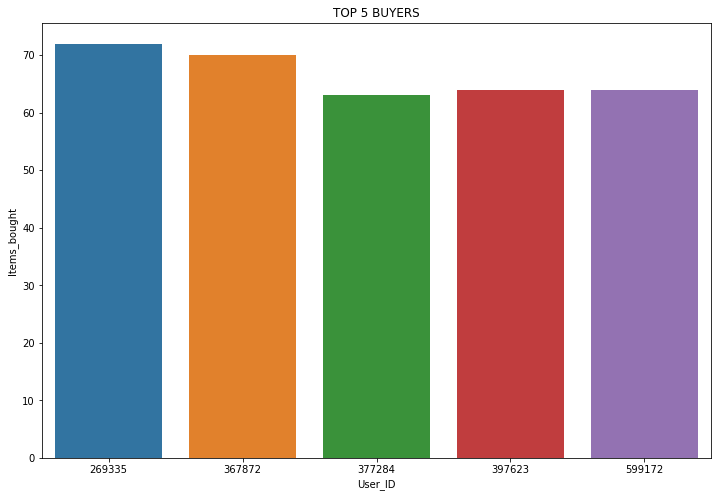

In [48]:
df_most_items_grp.reset_index(inplace=True)          #plotting the above generated top 5 byyers on a barplot using seaborn                   
plt.figure(figsize=(12,8))
plt.title('TOP 5 BUYERS')
sns.barplot(x='User_ID', y='Items_bought', data=df_most_items_grp);

## Preparing an item dictionary to be used to replace item_id with item_name

In [49]:
item_dict = item.set_index('Item_id')['Item_name'].to_dict() 

In [50]:
item_dict

{43: 'coffee',
 23: 'tea',
 38: 'juice',
 9: 'soda',
 39: 'sandwich loaves',
 37: 'dinner rolls',
 34: 'tortillas',
 13: 'bagels',
 28: 'canned vegetables',
 26: 'spaghetti sauce',
 41: 'ketchup',
 21: 'cheeses',
 14: 'eggs',
 16: 'milk',
 48: 'yogurt',
 8: 'butter',
 11: 'cereals',
 30: 'flour',
 1: 'sugar',
 31: 'pasta',
 5: 'waffles',
 22: 'frozen vegetables',
 36: 'ice cream',
 6: 'poultry',
 17: 'beef',
 47: 'pork',
 46: 'bananas',
 40: 'berries',
 25: 'cherries',
 20: 'grapefruit',
 32: 'apples',
 44: 'broccoli',
 10: 'carrots',
 45: 'cauliflower',
 42: 'cucumbers',
 2: 'lettuce',
 18: 'laundry detergent',
 27: 'dishwashing\xa0',
 24: 'paper towels',
 33: 'toilet paper',
 15: 'aluminum foil',
 7: 'sandwich bags',
 12: 'shampoo',
 35: 'soap',
 29: 'hand soap',
 19: 'shaving cream',
 4: 'baby items',
 3: 'pet items'}

## Preparing a list with item_name replacing item_id 

In [51]:
final_list = []            #preparing an item_list from id_list, corresponding to the item name with the item id
# final_list_count = []
for x in range(len(id_list)):
    temp_list = []
    temp_list = id_list[x]   #so temp_list is now a 1-d list
    for i in range(len(temp_list)):
        temp_list[i]  = item_dict[int(temp_list[i])]   #using the item_dict prepared before and indexing the values from it by passing the ID
    final_list.append(temp_list)
#     final_list_count.append(len(temp_list))

In [52]:
final_list

[['dishwashing\xa0', 'spaghetti sauce'],
 ['poultry', 'pork', 'beef'],
 ['laundry detergent',
  'shampoo',
  'tea',
  'frozen vegetables',
  'dishwashing\xa0',
  'coffee',
  'juice',
  'grapefruit',
  'soap',
  'sugar'],
 ['soda',
  'tea',
  'lettuce',
  'grapefruit',
  'spaghetti sauce',
  'pork',
  'dinner rolls'],
 ['pasta',
  'laundry detergent',
  'waffles',
  'bagels',
  'sugar',
  'cheeses',
  'yogurt',
  'milk',
  'spaghetti sauce',
  'lettuce',
  'broccoli',
  'apples',
  'grapefruit',
  'dinner rolls',
  'cucumbers',
  'soap',
  'berries',
  'pork',
  'shampoo',
  'sandwich bags'],
 ['coffee', 'hand soap', 'butter', 'dinner rolls', 'tea', 'cauliflower'],
 ['laundry detergent',
  'aluminum foil',
  'pasta',
  'cereals',
  'grapefruit',
  'apples',
  'cherries',
  'poultry',
  'pork'],
 ['eggs',
  'coffee',
  'poultry',
  'grapefruit',
  'sandwich bags',
  'cucumbers',
  'ketchup',
  'canned vegetables',
  'carrots',
  'frozen vegetables',
  'bananas'],
 ['sugar',
  'coffee',
 

## Preparing dataframe using User_ID and Item_name list

In [53]:
data_names = {'User_ID':purchase['user_id'],'Items_name':final_list}  #preparing the data to be used in creating the dataframe which contains the item name rather than the item ID

In [54]:
df_items_with_names = pd.DataFrame(data_names,columns=['User_ID','Items_name'])

In [55]:
df_items_with_names

,User_ID,Items_name
0,222087,"[dishwashing , spaghetti sauce]"
1,1343649,"[poultry, pork, beef]"
2,404134,"[laundry detergent, shampoo, tea, frozen veget..."
3,1110200,"[soda, tea, lettuce, grapefruit, spaghetti sau..."
4,224107,"[pasta, laundry detergent, waffles, bagels, su..."
...,...,...
39469,704794,"[yogurt, cucumbers, broccoli, carrots, lettuce]"
39470,31237,"[tea, cheeses, spaghetti sauce, dishwashing , ..."
39471,724925,"[pet items, sandwich loaves, canned vegetables..."
39472,651509,"[bagels, sandwich loaves, grapefruit, apples, ..."


## Splitting the multiple values in each cells w.r.t item_name

In [56]:
User_ids = purchase['user_id']

In [57]:
df_split =[]                  #splitting each of the comma separated items (from item_name column) into new individual cells/rows keeping the id number same
for z in range(len(final_list)):   
    temp_list = []
    temp_list = final_list[z]
    for j in range(len(temp_list)):
           df_split.append([User_ids[z], temp_list[j]])

In [58]:
df_split

[[222087, 'dishwashing\xa0'],
 [222087, 'spaghetti sauce'],
 [1343649, 'poultry'],
 [1343649, 'pork'],
 [1343649, 'beef'],
 [404134, 'laundry detergent'],
 [404134, 'shampoo'],
 [404134, 'tea'],
 [404134, 'frozen vegetables'],
 [404134, 'dishwashing\xa0'],
 [404134, 'coffee'],
 [404134, 'juice'],
 [404134, 'grapefruit'],
 [404134, 'soap'],
 [404134, 'sugar'],
 [1110200, 'soda'],
 [1110200, 'tea'],
 [1110200, 'lettuce'],
 [1110200, 'grapefruit'],
 [1110200, 'spaghetti sauce'],
 [1110200, 'pork'],
 [1110200, 'dinner rolls'],
 [224107, 'pasta'],
 [224107, 'laundry detergent'],
 [224107, 'waffles'],
 [224107, 'bagels'],
 [224107, 'sugar'],
 [224107, 'cheeses'],
 [224107, 'yogurt'],
 [224107, 'milk'],
 [224107, 'spaghetti sauce'],
 [224107, 'lettuce'],
 [224107, 'broccoli'],
 [224107, 'apples'],
 [224107, 'grapefruit'],
 [224107, 'dinner rolls'],
 [224107, 'cucumbers'],
 [224107, 'soap'],
 [224107, 'berries'],
 [224107, 'pork'],
 [224107, 'shampoo'],
 [224107, 'sandwich bags'],
 [409803, 'c

## Converting the above generated list into dataframe

In [59]:
user_item_df = pd.DataFrame(df_split, columns=['user_id', 'item_name'])
user_item_df.head()

,user_id,item_name
0,222087,dishwashing
1,222087,spaghetti sauce
2,1343649,poultry
3,1343649,pork
4,1343649,beef


In [60]:
user_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319995 entries, 0 to 319994
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    319995 non-null  int64 
 1   item_name  319995 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


## Preparing this dataframe to be plotted on the graph with xlabel as item_id instead of item_name

In [61]:
df_split_id =[]                  #splitting each of the comma separated items (from item_name column) into new individual cells/rows keeping the id number same
for z in range(len(id_list_temp)):   
    temp_list_id = []
    temp_list_id = id_list_temp[z]
    for j in range(len(temp_list_id)):
           df_split_id.append([User_ids[z], temp_list_id[j]])
user_id_df = pd.DataFrame(df_split_id, columns=['user_id', 'item_id'])
user_id_df.head()

,user_id,item_id
0,222087,27
1,222087,26
2,1343649,6
3,1343649,47
4,1343649,17


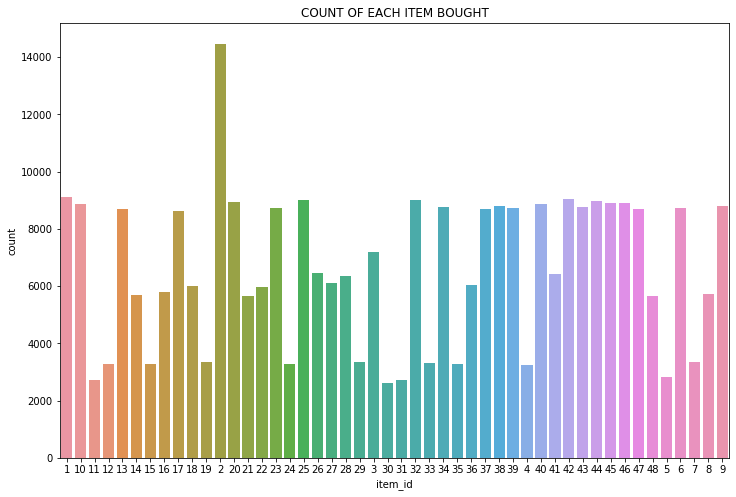

In [62]:
plt.figure(figsize=(12,8))
plt.title('COUNT OF EACH ITEM BOUGHT')
sns.countplot(x='item_id',data=user_id_df)

## Preparing data to find the max count of each item by a particular customer

In [63]:
item_list = user_item_df['item_name'].unique()

In [64]:
item_list

array(['dishwashing\xa0', 'spaghetti sauce', 'poultry', 'pork', 'beef',
       'laundry detergent', 'shampoo', 'tea', 'frozen vegetables',
       'coffee', 'juice', 'grapefruit', 'soap', 'sugar', 'soda',
       'lettuce', 'dinner rolls', 'pasta', 'waffles', 'bagels', 'cheeses',
       'yogurt', 'milk', 'broccoli', 'apples', 'cucumbers', 'berries',
       'sandwich bags', 'hand soap', 'butter', 'cauliflower',
       'aluminum foil', 'cereals', 'cherries', 'eggs', 'ketchup',
       'canned vegetables', 'carrots', 'bananas', 'pet items',
       'shaving cream', 'sandwich loaves', 'flour', 'tortillas',
       'toilet paper', 'paper towels', 'ice cream', 'baby items'],
      dtype=object)

In [65]:
item_max = []

for item in item_list:
    item_df = user_item_df[user_item_df["item_name"] == item]
    item_max.append([item, item_df['user_id'].value_counts().idxmax()])

In [66]:
item_max

[['dishwashing\xa0', 956666],
 ['spaghetti sauce', 1341188],
 ['poultry', 334664],
 ['pork', 1374100],
 ['beef', 366155],
 ['laundry detergent', 917199],
 ['shampoo', 791038],
 ['tea', 920002],
 ['frozen vegetables', 1199670],
 ['coffee', 996380],
 ['juice', 255546],
 ['grapefruit', 1433799],
 ['soap', 1003550],
 ['sugar', 1301034],
 ['soda', 397623],
 ['lettuce', 31625],
 ['dinner rolls', 364868],
 ['pasta', 289360],
 ['waffles', 217277],
 ['bagels', 820788],
 ['cheeses', 884172],
 ['yogurt', 943163],
 ['milk', 837807],
 ['broccoli', 297185],
 ['apples', 1303742],
 ['cucumbers', 80215],
 ['berries', 384935],
 ['sandwich bags', 360336],
 ['hand soap', 394348],
 ['butter', 478446],
 ['cauliflower', 1198106],
 ['aluminum foil', 143741],
 ['cereals', 367872],
 ['cherries', 109578],
 ['eggs', 172120],
 ['ketchup', 133355],
 ['canned vegetables', 238495],
 ['carrots', 743501],
 ['bananas', 1218645],
 ['pet items', 1433188],
 ['shaving cream', 31625],
 ['sandwich loaves', 599172],
 ['flour',

In [67]:
item_max_id = pd.DataFrame(item_max,columns=['Item_name','User_ID'])

# ANSWER TO THE QUE 1.b)

In [68]:
item_max_id

,Item_name,User_ID
0,dishwashing,956666
1,spaghetti sauce,1341188
2,poultry,334664
3,pork,1374100
4,beef,366155
5,laundry detergent,917199
6,shampoo,791038
7,tea,920002
8,frozen vegetables,1199670
9,coffee,996380


## Preparing a pivot table to use the data in KMeans clustering

In [69]:
user_item_df['val']=1  #this will add a new column to the dataframe

In [70]:
useritem_pivot = user_item_df.pivot_table(index=['user_id'],columns=['item_name'],values='val')
useritem_pivot.head(5)

item_name,aluminum foil,apples,baby items,bagels,bananas,beef,berries,broccoli,butter,canned vegetables,...,shaving cream,soap,soda,spaghetti sauce,sugar,tea,toilet paper,tortillas,waffles,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
47,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
113,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
123,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## Filling the NaN with '0'

In [71]:
useritem_pivot.fillna(0, inplace=True)

In [72]:
useritem_pivot.head()

item_name,aluminum foil,apples,baby items,bagels,bananas,beef,berries,broccoli,butter,canned vegetables,...,shaving cream,soap,soda,spaghetti sauce,sugar,tea,toilet paper,tortillas,waffles,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
47,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
123,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
useritem_pivot.to_csv('useritem_pivot.csv')

In [74]:
useritem = pd.read_csv("useritem_pivot.csv")

In [75]:
useritem.head()

,user_id,aluminum foil,apples,baby items,bagels,bananas,beef,berries,broccoli,butter,...,shaving cream,soap,soda,spaghetti sauce,sugar,tea,toilet paper,tortillas,waffles,yogurt
0,47,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,68,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,113,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,123,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,223,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [76]:
useritem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24885 entries, 0 to 24884
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            24885 non-null  int64  
 1   aluminum foil      24885 non-null  float64
 2   apples             24885 non-null  float64
 3   baby items         24885 non-null  float64
 4   bagels             24885 non-null  float64
 5   bananas            24885 non-null  float64
 6   beef               24885 non-null  float64
 7   berries            24885 non-null  float64
 8   broccoli           24885 non-null  float64
 9   butter             24885 non-null  float64
 10  canned vegetables  24885 non-null  float64
 11  carrots            24885 non-null  float64
 12  cauliflower        24885 non-null  float64
 13  cereals            24885 non-null  float64
 14  cheeses            24885 non-null  float64
 15  cherries           24885 non-null  float64
 16  coffee             248

In [77]:
useritem = useritem.drop('user_id',1)

In [78]:
useritem.head()

,aluminum foil,apples,baby items,bagels,bananas,beef,berries,broccoli,butter,canned vegetables,...,shaving cream,soap,soda,spaghetti sauce,sugar,tea,toilet paper,tortillas,waffles,yogurt
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Standardizing the data before applying the clustering method

In [79]:
useritem = useritem.apply(zscore)

In [80]:
useritem.head()

,aluminum foil,apples,baby items,bagels,bananas,beef,berries,broccoli,butter,canned vegetables,...,shaving cream,soap,soda,spaghetti sauce,sugar,tea,toilet paper,tortillas,waffles,yogurt
0,2.631090,-0.692197,2.639271,1.481378,1.453602,-0.671140,-0.683766,1.455748,-0.521392,1.800422,...,-0.385521,-0.381316,-0.682058,-0.560812,-0.697602,1.475447,-0.384145,-0.67795,-0.349368,-0.520643
1,-0.380071,-0.692197,-0.378893,-0.675047,-0.687946,1.490003,-0.683766,-0.686932,-0.521392,-0.555425,...,2.593889,-0.381316,-0.682058,-0.560812,-0.697602,1.475447,-0.384145,-0.67795,-0.349368,-0.520643
2,2.631090,1.444675,-0.378893,-0.675047,1.453602,-0.671140,-0.683766,-0.686932,-0.521392,-0.555425,...,-0.385521,-0.381316,1.466152,-0.560812,-0.697602,-0.677761,2.603183,-0.67795,-0.349368,-0.520643
3,-0.380071,-0.692197,2.639271,-0.675047,-0.687946,-0.671140,-0.683766,-0.686932,-0.521392,-0.555425,...,-0.385521,-0.381316,-0.682058,-0.560812,-0.697602,-0.677761,-0.384145,-0.67795,-0.349368,-0.520643
4,-0.380071,1.444675,-0.378893,-0.675047,-0.687946,1.490003,-0.683766,-0.686932,-0.521392,-0.555425,...,-0.385521,2.622497,-0.682058,-0.560812,1.433483,-0.677761,-0.384145,-0.67795,-0.349368,-0.520643


## Converting the dataframe values to array to be used in the algorithm

In [81]:
user_item_array = useritem.values

In [82]:
items = user_item_array[:,1:49]

In [83]:
items

array([[-0.69219719,  2.63927055,  1.48137777, ..., -0.67795015,
        -0.34936785, -0.52064342],
       [-0.69219719, -0.37889257, -0.67504726, ..., -0.67795015,
        -0.34936785, -0.52064342],
       [ 1.44467504, -0.37889257, -0.67504726, ..., -0.67795015,
        -0.34936785, -0.52064342],
       ...,
       [-0.69219719, -0.37889257,  1.48137777, ...,  1.47503472,
        -0.34936785,  1.92070036],
       [ 1.44467504, -0.37889257, -0.67504726, ...,  1.47503472,
        -0.34936785,  1.92070036],
       [-0.69219719, -0.37889257,  1.48137777, ...,  1.47503472,
         2.8623126 , -0.52064342]])

## Finding the optimum value of K using elbow method

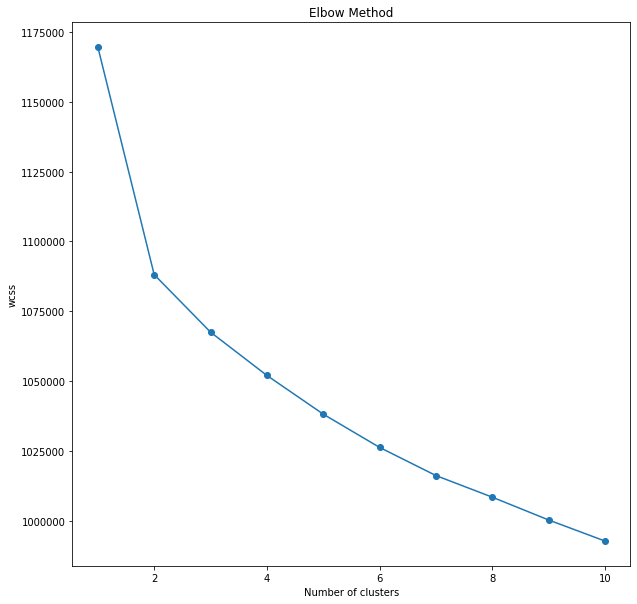

In [84]:
#Using the elbow method to find the optimum number of clusters
# from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(items)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,10)) 
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## K Means clustering

In [85]:
kmeans = KMeans(n_clusters=6)  #taking 6 clusters, using the elbow method.(domain expert should provide the cluster values here)
print(kmeans)
y_kmeans = kmeans.fit_predict(items)
print(y_kmeans)
# print(kmeans.cluster_centers_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[3 5 1 ... 4 0 4]


In [86]:
kmeans.labels_

array([3, 5, 1, ..., 4, 0, 4])

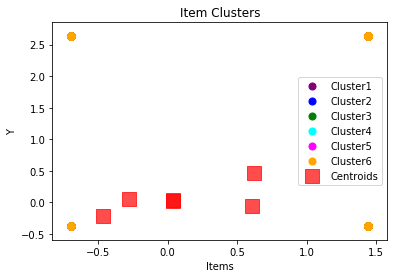

In [87]:
plt.scatter(items[y_kmeans==0,0],items[y_kmeans==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(items[y_kmeans==1,0],items[y_kmeans==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(items[y_kmeans==2,0],items[y_kmeans==2,1],s=50, c='green',label='Cluster3')
plt.scatter(items[y_kmeans==3,0],items[y_kmeans==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(items[y_kmeans==4,0],items[y_kmeans==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(items[y_kmeans==5,0],items[y_kmeans==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Item Clusters')
plt.xlabel('Items')
plt.ylabel('Y')
plt.legend()
plt.show()

In [88]:
items[y_kmeans==0,0]

array([-0.69219719,  1.44467504,  1.44467504, ...,  1.44467504,
        1.44467504,  1.44467504])

In [91]:
y_kmeans == 0,0

(True, 0)

In [1088]:
# plt.figure(figsize=(10,10))                     #not producing the desired results
# plt.scatter(items[:,0], items[:,1],c=y_kmeans,cmap='rainbow')    
# plt.show()